In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn

In [2]:
from torch.utils.data.dataset import Dataset

class RNNData(Dataset):
    def __init__(self):
        self.x = torch.zeros(26, 26, dtype=torch.float32)
        self.y = torch.arange(0, 26)
        self.x[self.y, self.y] = 1. # make one hot vec
        self.y = torch.remainder(self.y + 1, 26) # make predict next char
    
    def __len__(self):
        return self.y.shape[0]
    
    def __getitem__(self, index):
        x = self.x[index].view(1, -1)
        return x, self.y[index]

In [3]:
dataset = RNNData()

In [4]:
from torch.utils.data import DataLoader

batch_size = 1

dataloader = DataLoader(dataset, batch_size = batch_size)

In [5]:
class RNNModel(torch.nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = torch.nn.RNN(input_size = 26, hidden_size = 26, num_layers=1, batch_first=True)
    
    def forward(self, x):
        out, hid = self.rnn(x)
        return out

In [6]:
model = RNNModel()

In [7]:
criterion = torch.nn.CrossEntropyLoss() 

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=.1)

In [9]:
LOSSES = []

for epoch in range(100):
    for x, y in dataloader:
        h_0 = torch.zeros(1,10,1)
        y_hat = model(x)
        loss = criterion(y_hat[:,-1,:], y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        LOSSES.append(loss.item())

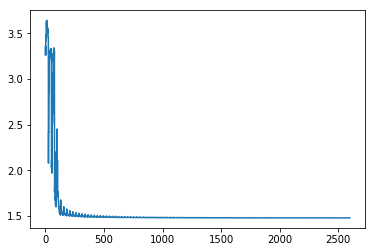

In [10]:
plt.plot(LOSSES[:])